In [3]:
"""
CORRER SOLO UNA VEZ, ES PARA DESCOMPRIMIR EL ARCHIVO BD.ZIP
"""

import zipfile
import os

# Directorio donde se extraerán los archivos
current_directory = os.getcwd()
# Ruta del archivo .zip
zip_path = os.path.join(current_directory, 'BD.zip')

# Descomprimir en el directorio actual 
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(current_directory)

print(f'Archivos extraídos en: {current_directory}')


Archivos extraídos en: c:\Users\mrive\OneDrive - Universidad Adolfo Ibanez\Semestre 10\Reconocimiento de patrones en imágenes\Tareas\Tarea 3


In [4]:
import cv2
from skimage.feature import graycomatrix, graycoprops
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

directorio_texturas = 'BD'
print(f'Directorio de texturas: {directorio_texturas}')

resultados = []


for folder in sorted(os.listdir(directorio_texturas)):
    
    folder_path = os.path.join(directorio_texturas, folder)
    # print(f"Procesando carpeta: {folder} en la ruta: {folder_path}")
    
    # Verificamos que es una carpeta
    if os.path.isdir(directorio_texturas):
        # print(f"Procesando carpeta: {folder}")
        
        for image_name in os.listdir(folder_path):
            
            image_path = os.path.join(folder_path, image_name)
            print(f"Procesando imagen: {image_name} del folder: {folder}")
            image = cv2.imread(f'{image_path}')
            
            features = ['contrast',
                        'energy',
                        'ASM',
                        'homogeneity',
                        'correlation',
                        'dissimilarity']
            ft_map = {
                "contrast": "Contraste",
                "energy": "Energía",
                "ASM": "ASM",
                "homogeneity": "Homogeneidad",
                "correlation": "Correlación",
                "dissimilarity": "Disimilaridad"}
            
            
            # Para los descriptores de los canales RGB
            image_RBG = cv2.imread(f"{image_path}", cv2.COLOR_BGR2RGB)
            canales = cv2.split(image)
            nombres_canales = ['R', 'G', 'B']
            for canal, nombre_canal in zip(canales, nombres_canales):
                glcm = graycomatrix(canal, 
                                    distances=[1],
                                    angles=[0],
                                    levels=256,
                                    symmetric=False,
                                    normed=False)
                resultados_fila = {
                    'Carpeta': folder,
                    'Canal': nombre_canal,
                    'Imagen': image_name
                }

                for ft in features:
                    if ft in ft_map:
                        ft_values = float(graycoprops(glcm, ft))
                        resultados_fila[ft_map[ft]] = ft_values
                resultados.append(resultados_fila)
                    
            # Para los descriptores de la imagen en escala de grises
            image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            glcm = graycomatrix(image_gray, 
                                distances=[1],
                                angles=[0],
                                levels=256,
                                symmetric=False,
                                normed=False)
            
            resultados_fila = {
                    'Carpeta': folder,
                    'Canal': "gray",
                    'Imagen': image_name
                }

            for ft in features:
                if ft in ft_map:
                    ft_values = float(graycoprops(glcm, ft))
                    resultados_fila[ft_map[ft]] = ft_values
            resultados.append(resultados_fila)
            
            
                
            

            

Directorio de texturas: BD
Procesando imagen: c264-1_1.jpg del folder: textura_01
Procesando imagen: c264-1_10.jpg del folder: textura_01
Procesando imagen: c264-1_11.jpg del folder: textura_01
Procesando imagen: c264-1_12.jpg del folder: textura_01
Procesando imagen: c264-1_13.jpg del folder: textura_01
Procesando imagen: c264-1_14.jpg del folder: textura_01
Procesando imagen: c264-1_15.jpg del folder: textura_01
Procesando imagen: c264-1_16.jpg del folder: textura_01
Procesando imagen: c264-1_17.jpg del folder: textura_01
Procesando imagen: c264-1_18.jpg del folder: textura_01


C:\Users\mrive\AppData\Local\Temp\ipykernel_21488\3103366308.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ft_values = float(graycoprops(glcm, ft))
C:\Users\mrive\AppData\Local\Temp\ipykernel_21488\3103366308.py:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ft_values = float(graycoprops(glcm, ft))


Procesando imagen: c264-1_19.jpg del folder: textura_01
Procesando imagen: c264-1_2.jpg del folder: textura_01
Procesando imagen: c264-1_20.jpg del folder: textura_01
Procesando imagen: c264-1_21.jpg del folder: textura_01
Procesando imagen: c264-1_22.jpg del folder: textura_01
Procesando imagen: c264-1_23.jpg del folder: textura_01
Procesando imagen: c264-1_24.jpg del folder: textura_01
Procesando imagen: c264-1_25.jpg del folder: textura_01
Procesando imagen: c264-1_26.jpg del folder: textura_01
Procesando imagen: c264-1_27.jpg del folder: textura_01
Procesando imagen: c264-1_28.jpg del folder: textura_01
Procesando imagen: c264-1_29.jpg del folder: textura_01
Procesando imagen: c264-1_3.jpg del folder: textura_01
Procesando imagen: c264-1_30.jpg del folder: textura_01
Procesando imagen: c264-1_31.jpg del folder: textura_01
Procesando imagen: c264-1_32.jpg del folder: textura_01
Procesando imagen: c264-1_33.jpg del folder: textura_01
Procesando imagen: c264-1_34.jpg del folder: textu

In [5]:


df_resultados = pd.DataFrame(resultados)
display(df_resultados)


Carpeta Canal         Imagen   Contraste   Energía       ASM  \
0     textura_01     R   c264-1_1.jpg   73.323855  0.018066  0.000326   
1     textura_01     G   c264-1_1.jpg   73.770297  0.018069  0.000326   
2     textura_01     B   c264-1_1.jpg   73.160819  0.018369  0.000337   
3     textura_01  gray   c264-1_1.jpg   72.717783  0.018293  0.000335   
4     textura_01     R  c264-1_10.jpg   72.781012  0.017860  0.000319   
...          ...   ...            ...         ...       ...       ...   
1995  textura_10  gray   a642-1_8.jpg  102.051550  0.017143  0.000294   
1996  textura_10     R   a642-1_9.jpg  105.441863  0.017695  0.000313   
1997  textura_10     G   a642-1_9.jpg  106.592337  0.017137  0.000294   
1998  textura_10     B   a642-1_9.jpg  103.988482  0.018870  0.000356   
1999  textura_10  gray   a642-1_9.jpg  105.204514  0.017733  0.000314   

      Homogeneidad  Correlación  Disimilaridad  
0         0.169128     0.979387       6.281124  
1         0.171021     0.980485       6.277478  
2         0.170204     0.979984       6.256659  
3         0.171963     0.980319       6.228369  
4         0.173032     0.981427       6.227181  
...            ...          ...            ...  
1995      0.155840     0.961583       7.158731  
1996      0.158767     0.955224       7.153349  
1997      0.157341     0.958782       7.192723  
1998      0.160062     0.942124       7.096177  
1999      0.158630     0.954026       7.139679  

[2000 rows x 9 columns]

In [6]:
            
from sklearn.preprocessing import StandardScaler
columnas = ["Contraste", "Energía", "ASM", "Homogeneidad", "Correlación", "Disimilaridad"]

scaler = StandardScaler()
df_resultados[columnas] = scaler.fit_transform(df_resultados[columnas])

display(df_resultados)


Contraste       Energía           ASM  Homogeneidad   Correlación  \
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03   
mean   2.842171e-17  2.842171e-17 -5.684342e-17 -5.684342e-17  3.126388e-16   
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00   
min   -1.168559e+00 -1.308944e+00 -9.207809e-01 -1.674426e+00 -3.794729e+00   
25%   -6.319851e-01 -6.564501e-01 -6.091458e-01 -6.743909e-01 -5.198364e-01   
50%   -2.866682e-01 -3.779749e-01 -4.349235e-01 -7.843603e-02  4.063061e-01   
75%    1.649009e-01  5.489299e-01  3.226220e-01  7.216031e-01  7.660281e-01   
max    3.642713e+00  4.568204e+00  6.768439e+00  3.501883e+00  1.105481e+00   

       Disimilaridad  
count   2.000000e+03  
mean   -1.421085e-16  
std     1.000250e+00  
min    -1.666302e+00  
25%    -6.065503e-01  
50%    -2.618498e-01  
75%     3.031763e-01  
max     2.868640e+00

In [7]:
# pip install mlxtend

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

X = df_resultados[columnas] 
y = df_resultados["Carpeta"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda = LDA() #maximiza el índice de Fisher

sfs = SFS(lda, 
          k_features='best',  # Se puede especificar un número de características o 'best', podemos cambiar esto!!
          forward=True, 
          floating=False,
          scoring='accuracy', 
          cv=5)  # Validación cruzada

sfs = sfs.fit(X_train, y_train)

print('Mejores características seleccionadas:', sfs.k_feature_names_)
print('Precisión de validación cruzada:', sfs.k_score_)

X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)

lda.fit(X_train_sfs, y_train)
y_pred = lda.predict(X_test_sfs)


print('Precisión en conjunto de prueba:', accuracy_score(y_test, y_pred))

Mejores características seleccionadas: ('Contraste', 'Energía', 'Homogeneidad', 'Correlación')
Precisión de validación cruzada: 0.8300000000000001
Precisión en conjunto de prueba: 0.825


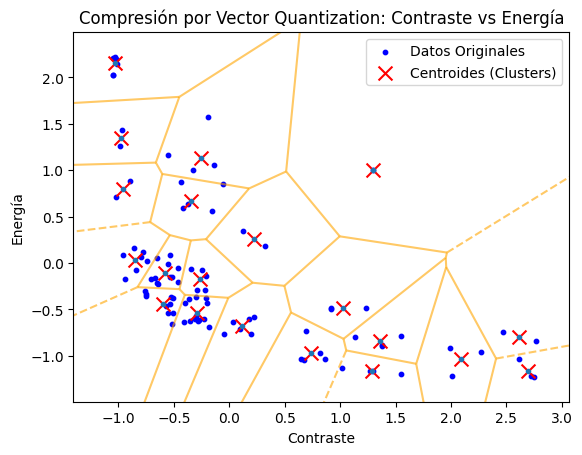

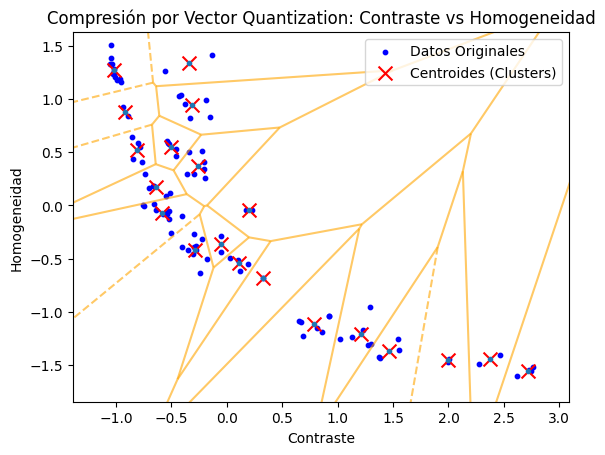

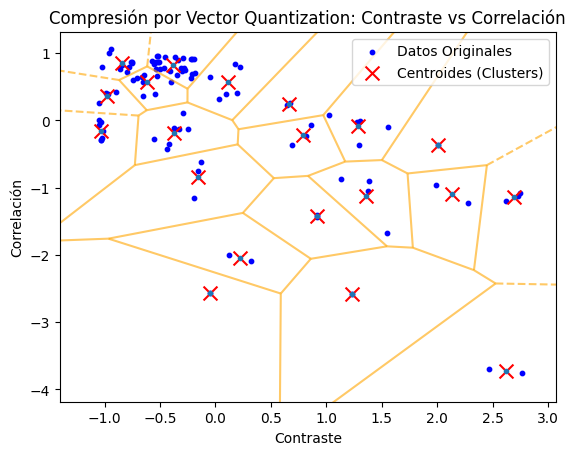

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d

# Definir el número de muestras a reducir
num_muestras = 100

df_muestra = df_resultados.sample(n=num_muestras, random_state=42)

# Definir el número de clusters (centroides) para la compresión por VQ
num_clusters = 20


def graficar_voronoi(caracteristicas, x_label, y_label, titulo):
    # Aplicar el algoritmo KMeans para la compresión VQ
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(caracteristicas)

    # Obtener los centroides
    centroides = kmeans.cluster_centers_

    # Graficar los centroides y los datos originales
    plt.scatter(caracteristicas[:, 0], caracteristicas[:, 1], s=10, c='blue', label='Datos Originales')
    plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='red', marker='x', label='Centroides (Clusters)')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.title(titulo)

    # Calcular el diagrama de Voronoi y graficarlo
    vor = Voronoi(centroides)
    voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=1.5, line_alpha=0.6)

    plt.show()

# Contraste vs Energía
caracteristicas_ce = df_muestra[["Contraste", "Energía"]].values
graficar_voronoi(caracteristicas_ce, "Contraste", "Energía", "Compresión por Vector Quantization: Contraste vs Energía")

# Contraste vs Homogeneidad
caracteristicas_ch = df_muestra[["Contraste", "Homogeneidad"]].values
graficar_voronoi(caracteristicas_ch, "Contraste", "Homogeneidad", "Compresión por Vector Quantization: Contraste vs Homogeneidad")

# Contraste vs Correlación
caracteristicas_cc = df_muestra[["Contraste", "Correlación"]].values
graficar_voronoi(caracteristicas_cc, "Contraste", "Correlación", "Compresión por Vector Quantization: Contraste vs Correlación")

